<a href="https://colab.research.google.com/github/heeejini/DataScience_TermProject/blob/main/Data_Science_Term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



데이터 수집 및 전처리: 영화 데이터를 수집하고 필요한 경우 전처리를 수행합니다. 예를 들어, 결측치 처리, 이상치 제거, 범주형 변수 인코딩 등을 수행할 수 있습니다.

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (15.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and dir

In [5]:
import io
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumBarunGothic') 



# 엑셀 파일 로드
file_path = '/content/drive/MyDrive/data/KOBIS_개봉일람_2023-05-13.csv'
df = pd.read_csv(file_path, encoding='utf-8')
df.head()

,Unnamed: 0,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분
0,1,1,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
1,2,2,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754","27,530,825,087","3,346,172",판타지,12세이상관람가,일반영화
2,3,3,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화
3,4,4,겨울왕국 2,"크리스 벅,제니퍼 리",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,개봉영화,장편,미국,"2,648","114,810,421,450","13,747,792","28,824,682,580","3,225,974",애니메이션,전체관람가,일반영화
4,5,5,베테랑,류승완,"(주)외유내강,(주)필름케이",NaN,(주)씨제이이엔엠,2015-08-05,개봉영화,장편,한국,"1,064","105,024,756,250","13,395,400","26,766,369,950","3,290,366",액션,15세이상관람가,일반영화


In [6]:
df1 = pd.read_csv(file_path, encoding='utf-8') # linear regression으로 nan값 예측하기 위해 df1생성
df1['국적'].isna().sum()

0

In [8]:
print(df.describe()) 
print()

# 변수 개수 출력
print(f"총 변수 개수: {len(df.columns)}")
print(df.columns)
print()
# 피처 개수 x의 개수 출력
print(f"총 샘플 개수: {len(df)}")
print()


         Unnamed: 0            순번
count  14301.000000  14301.000000
mean    7151.000000   7151.000000
std     4128.487435   4128.487435
min        1.000000      1.000000
25%     3576.000000   3576.000000
50%     7151.000000   7151.000000
75%    10726.000000  10726.000000
max    14301.000000  14301.000000

총 변수 개수: 19
Index(['Unnamed: 0', '순번', '영화명', '감독', '제작사', '수입사', '배급사', '개봉일', '영화유형',
       '영화형태', '국적', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '장르', '등급',
       '영화구분'],
      dtype='object')

총 샘플 개수: 14301



In [9]:
# 데이터의 결측치 개수 출력
print(df.isna().sum())

Unnamed: 0       0
순번               0
영화명              0
감독            1293
제작사           9353
수입사           6628
배급사             16
개봉일              0
영화유형             0
영화형태             0
국적               0
전국스크린수           0
전국매출액            0
전국관객수            0
서울매출액            0
서울관객수            0
장르              69
등급               0
영화구분             0
dtype: int64


In [10]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumGothic' # 나눔고딕 적용하기

<Axes: >

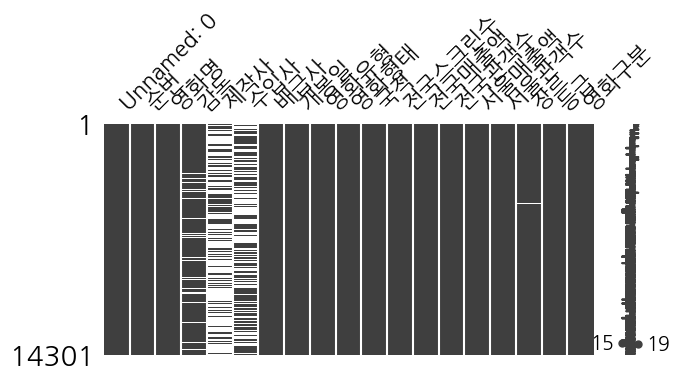

In [11]:
#결측치 확인
msno.matrix(df, figsize=(7, 3))

In [12]:
df.dtypes

Unnamed: 0     int64
순번             int64
영화명           object
감독            object
제작사           object
수입사           object
배급사           object
개봉일           object
영화유형          object
영화형태          object
국적            object
전국스크린수        object
전국매출액         object
전국관객수         object
서울매출액         object
서울관객수         object
장르            object
등급            object
영화구분          object
dtype: object

In [13]:
filter_list = ['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']
for fl in filter_list:
  df[fl] = df[fl].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df.head()
df = df.astype({'전국스크린수':'int64', '전국매출액':'int64', '전국관객수':'int64', '서울매출액':'int64', '서울관객수':'int64'})

<Axes: >

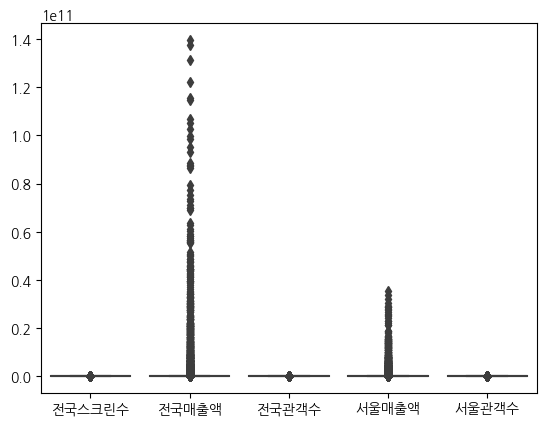

In [14]:
#이상치 확인
sns.boxplot(data=df[['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']])

In [15]:
#너무 많은 결측치를 가지고 있는 제작사,수입사 제거
#모두 똑같은 값을 가지고 있는 영화유형, 영화형태 제거
#순번 제거
print(df.head())

df = df.drop(columns=['제작사', '수입사'])
df = df.drop(columns=['영화유형', '영화형태'])
df = df.drop(columns=['순번'])

# 결과 확인
print(df.head())

   Unnamed: 0  순번         영화명           감독                             제작사  \
0           1   1        극한직업          이병헌  (주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠   
1           2   2   신과함께-죄와 벌          김용화          리얼라이즈픽쳐스(주),(주)덱스터스튜디오   
2           3   3  어벤져스: 엔드게임  안소니 루소,조 루소                             NaN   
3           4   4      겨울왕국 2  크리스 벅,제니퍼 리                             NaN   
4           5   5         베테랑          류승완                 (주)외유내강,(주)필름케이   

                  수입사                 배급사         개봉일  영화유형 영화형태  국적  전국스크린수  \
0                 NaN           (주)씨제이이엔엠  2019-01-23  개봉영화   장편  한국    1978   
1                 NaN       롯데쇼핑㈜롯데엔터테인먼트  2017-12-20  개봉영화   장편  한국    1912   
2  월트디즈니컴퍼니코리아 유한책임회사  월트디즈니컴퍼니코리아 유한책임회사  2019-04-24  개봉영화   장편  미국    2835   
3  월트디즈니컴퍼니코리아 유한책임회사  월트디즈니컴퍼니코리아 유한책임회사  2019-11-21  개봉영화   장편  미국    2648   
4                 NaN           (주)씨제이이엔엠  2015-08-05  개봉영화   장편  한국    1064   

          전국매출액     전국관객수        서울매출액    서울관객수   

2. 데이터 탐색: 시각화 및 통계 분석을 통해 데이터의 특성을 파악합니다. 예를 들어, 상관 관계 분석, 히스토그램 및 상자 그림 등을 사용하여 데이터의 분포와 패턴을 확인할 수 있습니다.

In [16]:
# 상관관계 행렬
correlation_matrix = df.corr()

# 상관관계 행렬에서 대각선을 제외한 상관계수의 절댓값을 정렬
sorted_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1]

# 상관계수가 높은 변수 쌍 3개와 낮은 변수 쌍 3개를 출력
print("상관 계수가 높은 변수 쌍 3개:")
print(sorted_correlations.head(3))
print("\n상관 계수가 낮은 변수 쌍 3개:")
print(sorted_correlations.tail(3))

상관 계수가 높은 변수 쌍 3개:
전국매출액  전국관객수    0.994284
전국관객수  전국매출액    0.994284
서울관객수  서울매출액    0.994154
dtype: float64

상관 계수가 낮은 변수 쌍 3개:
전국관객수       Unnamed: 0    0.240242
Unnamed: 0  전국매출액         0.237227
전국매출액       Unnamed: 0    0.237227
dtype: float64



전국 매출액과 상관계수가 높은 변수 순서:
전국관객수         0.994284
서울매출액         0.990515
서울관객수         0.985860
전국스크린수        0.720387
Unnamed: 0   -0.237227
Name: 전국매출액, dtype: float64
            Unnamed: 0    전국스크린수     전국매출액     전국관객수     서울매출액     서울관객수
Unnamed: 0    1.000000 -0.494400 -0.237227 -0.240242 -0.244717 -0.248392
전국스크린수       -0.494400  1.000000  0.720387  0.712298  0.721456  0.713999
전국매출액        -0.237227  0.720387  1.000000  0.994284  0.990515  0.985860
전국관객수        -0.240242  0.712298  0.994284  1.000000  0.984454  0.991158
서울매출액        -0.244717  0.721456  0.990515  0.984454  1.000000  0.994154
서울관객수        -0.248392  0.713999  0.985860  0.991158  0.994154  1.000000


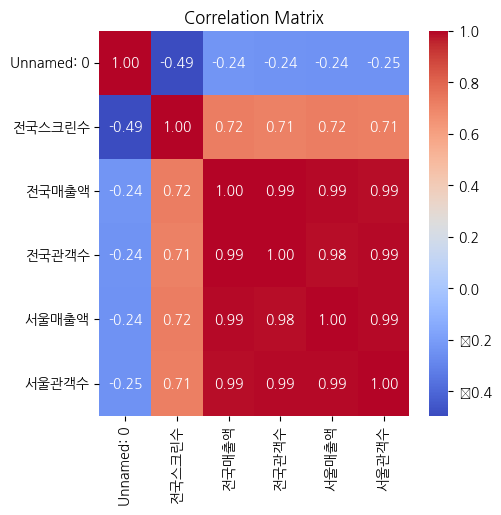

In [17]:
#전국 매출액과 상관계수가 높은 변수를 순서대로 출력
print("\n전국 매출액과 상관계수가 높은 변수 순서:")
print(correlation_matrix['전국매출액'].sort_values(ascending=False)[1:])

# 상관 관계 분석
corr_matrix = df.corr()
print(corr_matrix)

# 상관 관계 시각화
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [18]:
grouped_mean = df.groupby(['국적'])['전국매출액'].mean().sort_values()
grouped_mean.shape

(66,)

국적
러시아      8.563270e+07
체코       8.693503e+07
독일       9.097467e+07
스페인      9.124954e+07
인도       1.000015e+08
뉴질랜드     1.071477e+08
아르헨티나    1.117523e+08
프랑스      1.192296e+08
그리스      1.209400e+08
페루       1.212035e+08
영국       2.698711e+08
아일랜드     3.843884e+08
대만       4.462079e+08
벨기에      5.301352e+08
한국       1.168625e+09
미국       2.211878e+09
Name: 전국매출액, dtype: float64


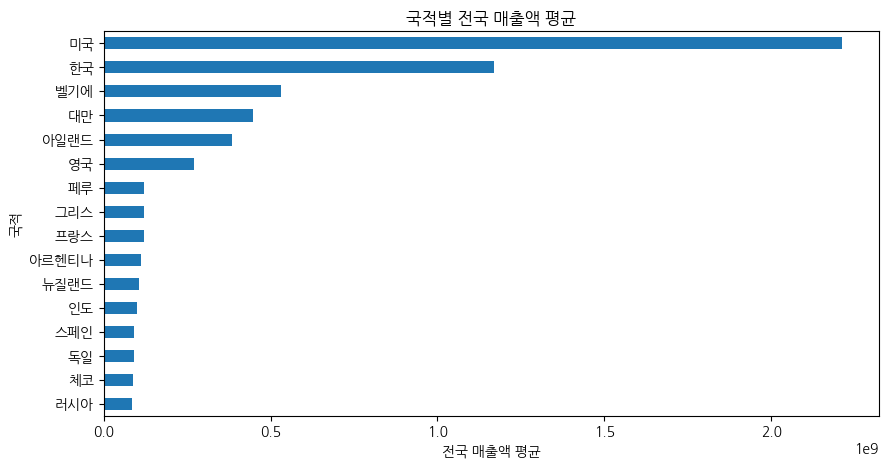

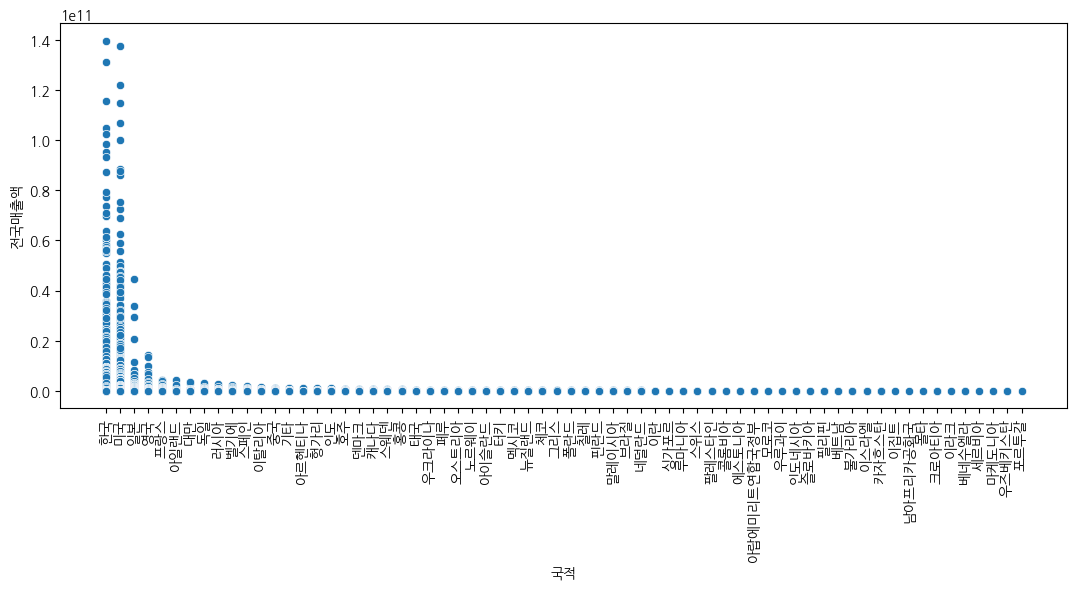

In [19]:
grouped_mean = df.groupby(['국적'])['전국매출액'].mean().sort_values()[50: 66]
print(grouped_mean)

plt.figure(figsize=(10, 5))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('국적')
plt.title('국적별 전국 매출액 평균')
plt.show()


plt.figure(figsize=[13,5])
ax = sns.scatterplot(data=df, x='국적', y = '전국매출액')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # 이름 기울이기
plt.show()

장르
성인물(에로)     4.591753e+04
서부극(웨스턴)    9.880909e+04
멜로/로맨스      6.897433e+07
기타          7.928896e+07
공연          1.132178e+08
다큐멘터리       1.473944e+08
가족          2.027988e+08
공포(호러)      4.022337e+08
SF          4.829363e+08
전쟁          7.793838e+08
드라마         8.540438e+08
스릴러         9.026329e+08
뮤지컬         1.029778e+09
코미디         1.647112e+09
애니메이션       1.679868e+09
미스터리        2.052703e+09
판타지         2.573633e+09
액션          3.397130e+09
범죄          4.170223e+09
어드벤처        4.304343e+09
사극          1.114020e+10
Name: 전국매출액, dtype: float64


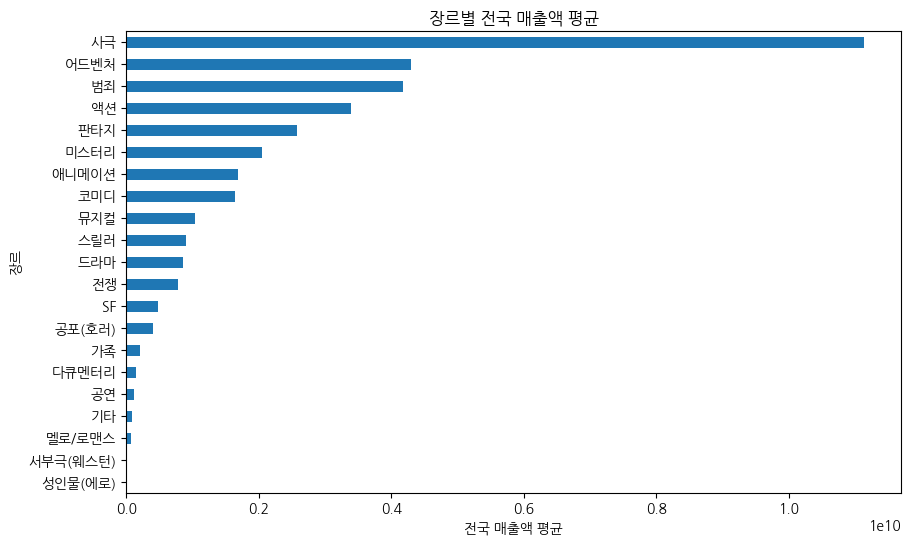

<Axes: xlabel='장르', ylabel='전국매출액'>

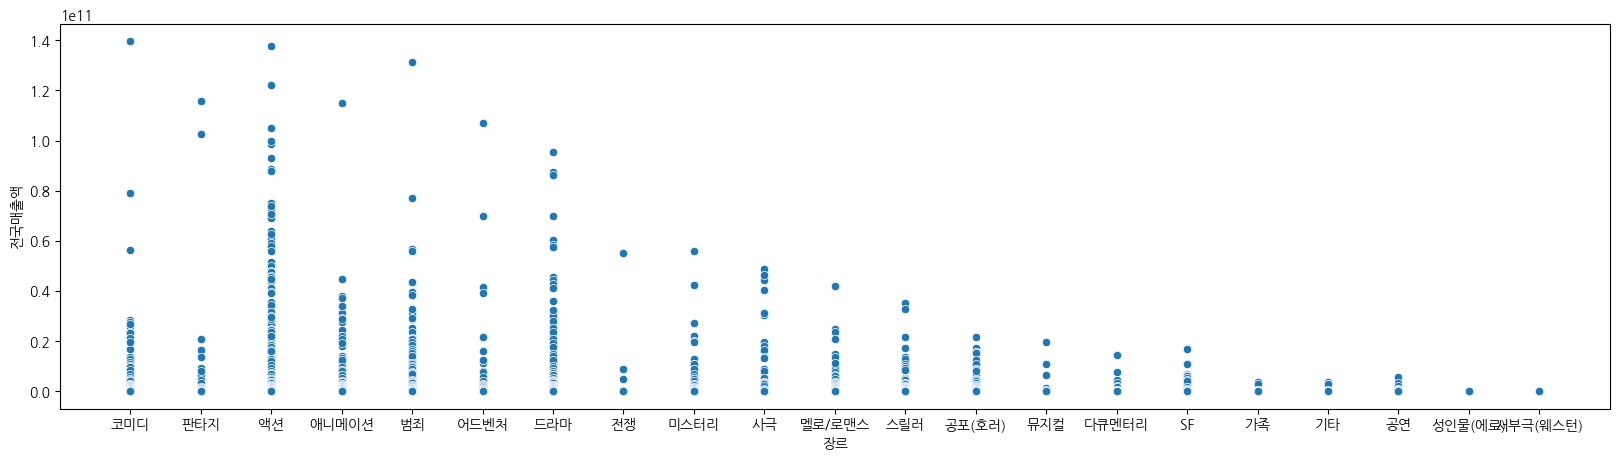

In [20]:
grouped_mean = df.groupby(['장르'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(10, 6))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('장르')
plt.title('장르별 전국 매출액 평균')
plt.show()

plt.figure(figsize=[20,5])
sns.scatterplot(data=df, x='장르', y = '전국매출액')

---- unique key 개수 줄이는 부분 ----

In [21]:
df['등급'].value_counts() # 15세관람가 부터는 개수가 너무 적기 때문에 나머지를 삭제해준다.
filters = list(df['등급'].value_counts().index[4:])

for filter in filters:
  df.drop(df[df['등급']==filter].index, axis=0, inplace=True)

df['등급'].value_counts()# 등급의 unique 값이 4개로 줄어든 것을 알 수 있다
def get_dir(x): # 매출액 상위 15명과 영화를 많이 만든 상위 15명 감독을 제외하고 나머지를 기타로 바꿔주는 함수
  director_filter = list(df.groupby(['감독'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False]).index[:15]) + list(df['감독'].value_counts().index[:15])
  for filter in director_filter:
    if (director_filter.count(x)>0):
      return x
    else:
      return '기타'

df['감독'] = df['감독'].apply(get_dir)# 함수 적용

df_distributor_list = df.groupby(['배급사'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])
df_distributor_list = df_distributor_list[:15].index + df['배급사'].value_counts()[:15].index
# 가장 영화를 많이 만든 상위 15개의 제작사와 매출액이 가장 높은 상위 15개의 배급사 목록을 만들었다.
def get_distributor(x): # 매출액 상위 15명과 영화를 많이 만든 상위 15명 배급사를 제외하고 나머지를 기타로 바꿔주는 함수
  df_distributor_filter = list(df.groupby(['배급사'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:15].index) + list(df['배급사'].value_counts()[:15].index)
  for filter in df_distributor_filter:
    if (df_distributor_filter.count(x)>0):
      return x
    else:
      return '기타'

df['배급사'] = df['배급사'].apply(get_distributor)# 함수 적용

# 장르는 얼마 없기 때문에 매출액의 평균순으로 인코딩함
def get_country(x): #  매출액 상위 6개의 국가를 제외한 나머지를 기타로 바꿔주는 함수
  df_country_filter = list(df.groupby(['국적'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:6].index)
  for filter in df_country_filter:
    if (df_country_filter.count(x)>0):
      return x
    else:
      return '기타'

df['국적'] = df['국적'].apply(get_country)# 함수 적용

In [22]:
df['개봉일'] = pd.to_datetime(df['개봉일']) # 개봉월 column 추가
df['개봉월'] = df['개봉일'].dt.month

In [23]:
def remove_row(x):
  preprocessing_col_list = [2, 3, 5, 10, 11]
  cnt_list = []
  for idx in range(x.shape[0]):
    cnt=0
    for col in preprocessing_col_list:
      if x.iat[idx, col] =='기타':
        cnt += 1
    if(cnt>2):  
      cnt_list.append(idx)
  return cnt_list

df_cnt = remove_row(df)

In [24]:
df.index = range(df.shape[0])

In [25]:
def remove_row(x):
  preprocessing_col_list = [2, 3, 5, 10, 11]
  cnt_list = []
  for idx in range(x.shape[0]):
    cnt=0
    for col in preprocessing_col_list:
      if x.iat[idx, col] =='기타':
        cnt += 1
    if(cnt>2):  
      cnt_list.append(idx)
  return cnt_list

df_cnt = remove_row(df)
df.drop(df_cnt, axis=0, inplace=True)

In [26]:
director_filter = list(df.groupby(['감독'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:15].index) + list(df['감독'].value_counts().index[:15])
replace_dict = {}
for idx, director_name in enumerate(director_filter):
  replace_dict[director_name] = idx
df['감독'] = df['감독'].map(replace_dict)


distributor_filter = list(df.groupby(['배급사'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:15].index) + list(df['배급사'].value_counts()[:15].index)
replace_dict = {}
for idx, distributor in enumerate(distributor_filter):
  replace_dict[distributor] = idx

df['배급사'] = df['배급사'].map(replace_dict)



film_rating_filter = ['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가']
replace_dict = {}
for idx, film_rating in enumerate(film_rating_filter):
  replace_dict[film_rating] = idx

df['등급'] = df['등급'].map(replace_dict)



genre_filter = list(df.groupby(['장르'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False]).index)
replace_dict = {}
for idx, genre in enumerate(genre_filter):
  replace_dict[genre] = idx

df['장르'] = df['장르'].map(replace_dict)



country_filter = list(df.groupby(['국적'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:6].index)
replace_dict = {}
for idx, country in enumerate(country_filter):
  replace_dict[country] = idx
replace_dict['기타'] = 6
df['국적'] = df['국적'].map(replace_dict)

            Unnamed: 0        감독       배급사        국적    전국스크린수     전국매출액  \
Unnamed: 0    1.000000  0.162619  0.242793  0.390863 -0.526190 -0.270731   
감독            0.162619  1.000000  0.042858  0.006650 -0.132907 -0.137095   
배급사           0.242793  0.042858  1.000000  0.108677 -0.227817 -0.181026   
국적            0.390863  0.006650  0.108677  1.000000 -0.232615 -0.121653   
전국스크린수       -0.526190 -0.132907 -0.227817 -0.232615  1.000000  0.728796   
전국매출액        -0.270731 -0.137095 -0.181026 -0.121653  0.728796  1.000000   
전국관객수        -0.274032 -0.134833 -0.181339 -0.122517  0.720187  0.994308   
서울매출액        -0.278020 -0.132258 -0.182555 -0.128009  0.730323  0.990629   
서울관객수        -0.282000 -0.130064 -0.183110 -0.128905  0.722258  0.985891   
장르            0.520680  0.154009  0.138589  0.338124 -0.406937 -0.227418   
등급            0.572331  0.184277  0.196292  0.316520 -0.390579 -0.213935   
개봉월          -0.016016 -0.014893 -0.018352 -0.036839  0.001193  0.012263   

           

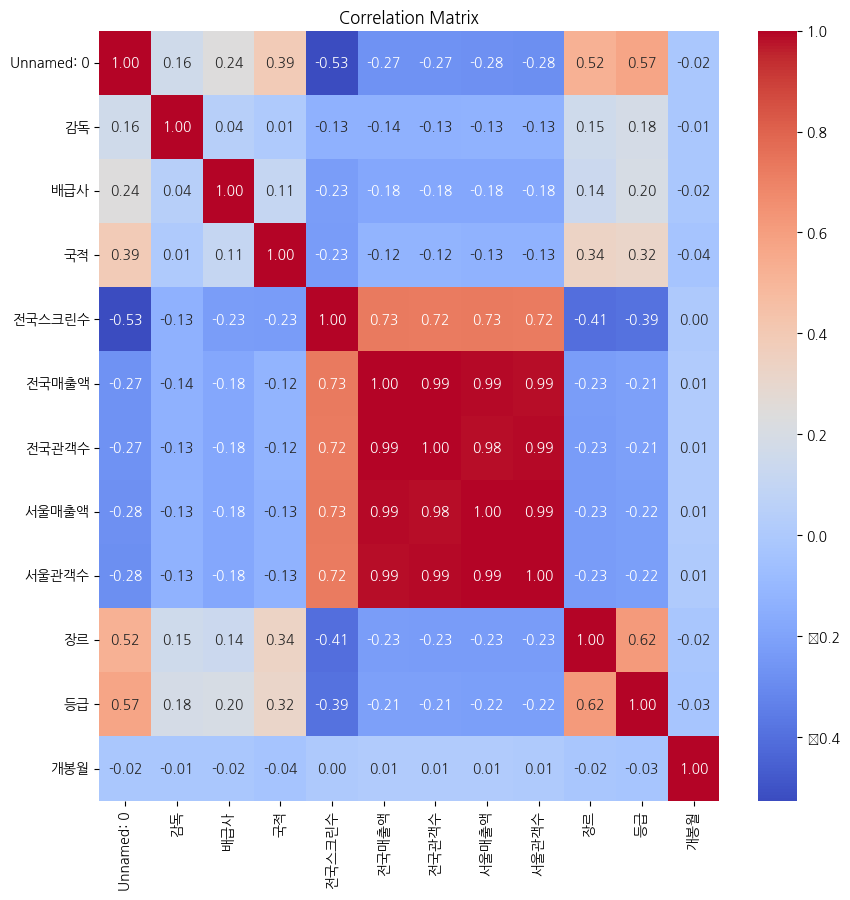

In [27]:
# 상관 관계 분석
corr_matrix = df.corr()
print(corr_matrix)

# 상관 관계 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [28]:
# rank인코딩 된 부분이 어느정도 결과값과 반비례관계를 가지도록 만들었다.

여기까지 preprocessing부분입니다!

등급
3    9.538580e+07
2    1.739347e+09
1    2.125261e+09
0    4.282077e+09
Name: 전국매출액, dtype: float64


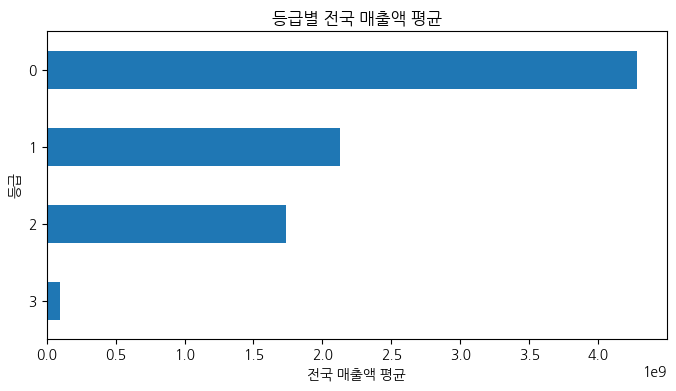

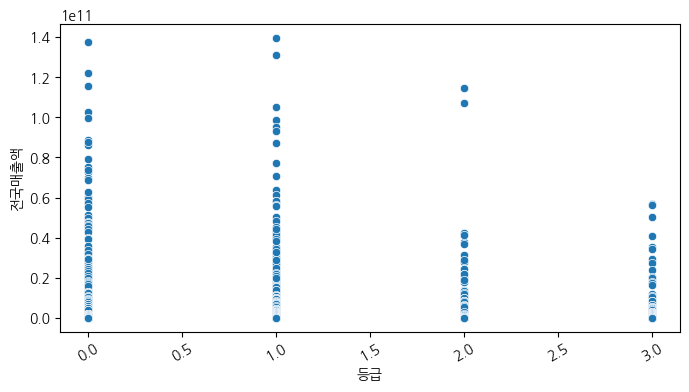

In [29]:
grouped_mean = df.groupby(['등급'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(8, 4))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('등급')
plt.title('등급별 전국 매출액 평균')
plt.show()

plt.figure(figsize=[8,4])
ax = sns.scatterplot(data=df, x='등급', y = '전국매출액')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30) # 이름 기울이기
plt.show()

영화구분
독립/예술영화    1.588132e+08
일반영화       1.115267e+09
Name: 전국매출액, dtype: float64


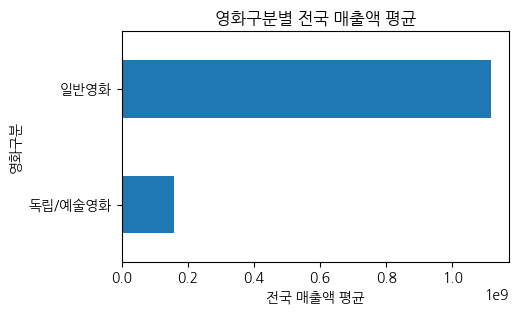

<Axes: xlabel='영화구분', ylabel='전국매출액'>

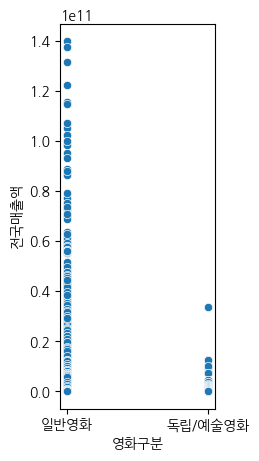

In [30]:
grouped_mean = df.groupby(['영화구분'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(5, 3))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('영화구분')
plt.title('영화구분별 전국 매출액 평균')
plt.show()

plt.figure(figsize=[2,5])
sns.scatterplot(data=df, x='영화구분', y = '전국매출액')

         감독   배급사    장르  등급  국적  전국스크린수
0      13.0  12.0   7.0   1   1    1978
1       2.0  15.0   4.0   0   1    1912
2       5.0   9.0   3.0   0   0    2835
3       1.0   9.0   5.0   2   0    2648
4       9.0  12.0   3.0   1   1    1064
...     ...   ...   ...  ..  ..     ...
14287  15.0  15.0  18.0   3   0       1
14290  15.0  17.0  20.0   3   6       1
14291  15.0  16.0  18.0   3   6       1
14292  15.0  15.0  20.0   3   1       1
14293  15.0  17.0  20.0   3   6       1

[11387 rows x 6 columns]
[[4.48275862e-01 4.13793103e-01 3.50000000e-01 3.33333333e-01
  1.66666667e-01 6.70963365e-01]
 [6.89655172e-02 5.17241379e-01 2.00000000e-01 0.00000000e+00
  1.66666667e-01 6.48575305e-01]
 [1.72413793e-01 3.10344828e-01 1.50000000e-01 0.00000000e+00
  0.00000000e+00 9.61668928e-01]
 ...
 [5.17241379e-01 5.51724138e-01 9.00000000e-01 1.00000000e+00
  1.00000000e+00 3.39213026e-04]
 [5.17241379e-01 5.17241379e-01 1.00000000e+00 1.00000000e+00
  1.66666667e-01 3.39213026e-04]
 [5.17241379e-

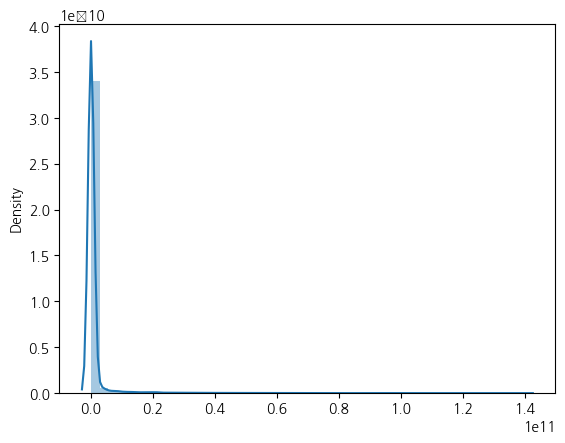

In [31]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

#, '서울매출액','전국스크린수','서울관객수', '전국관객수'
features = ['감독', '배급사', '장르', '등급', '국적', '전국스크린수']
df.dropna(inplace=True)

X = df[features]
print(X)
target = ['전국매출액']
y = df[target]

sns.distplot(y)
#로그변환
y = np.log1p(y)

from sklearn.preprocessing import MaxAbsScaler
# 변형 객체 생성
maxAbs = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxAbs.fit(X)

# 훈련 데이터 스케일링
X = maxAbs.transform(X)

print(X)
# 변형 객체 생성
maxAbs = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxAbs.fit(y)

# 훈련 데이터 스케일링
y = maxAbs.transform(y)

print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best MAE:  0.08441199712833208
Best parameters:  {'alpha': 0.1, 'solver': 'svd'}
Model 1 MAE: 0.08441199712833208
Model 1 parameters: {'alpha': 0.1, 'solver': 'svd'}
Model 2 MAE: 0.08441199712833221
Model 2 parameters: {'alpha': 0.1, 'solver': 'auto'}
Model 3 MAE: 0.08441199712833221
Model 3 parameters: {'alpha': 0.1, 'solver': 'cholesky'}
Model 4 MAE: 0.08441199712868121
Model 4 parameters: {'alpha': 0.1, 'solver': 'lsqr'}
Model 5 MAE: 0.08441199713086063
Model 5 parameters: {'alpha': 0.1, 'solver': 'sparse_cg'}
Test MAE: 0.0859145320783361


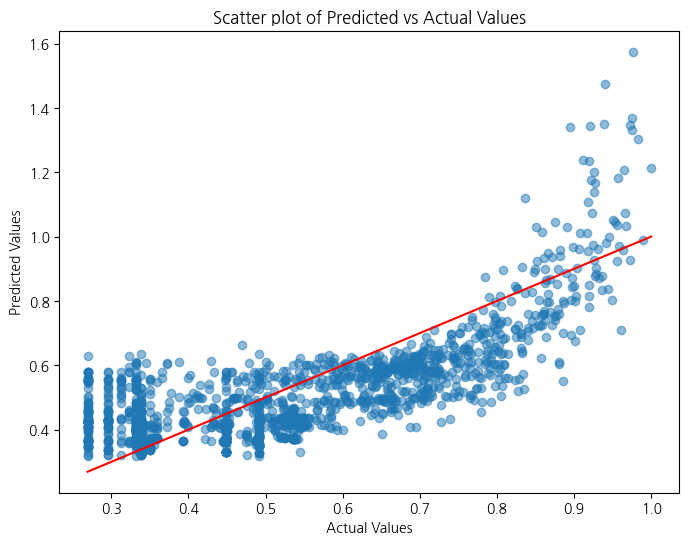

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
##Ridge사용 부분

# Parameters
params = {'alpha': [0.1, 1.0, 10.0],
          'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

ridge = Ridge()

grid = GridSearchCV(ridge, params, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_score = -grid.best_score_  # GridSearchCV uses negative MAE
best_params = grid.best_params_

print("Best MAE: ", best_score)
print("Best parameters: ", best_params)


cv_results = grid.cv_results_

# 점수와 매개변수를 단일 목록으로 결합하고 점수별로 정렬
scores_params = sorted(zip(cv_results['mean_test_score'], cv_results['params']), key=lambda x: x[0], reverse=True)

# Top 5 models
for i in range(5):
    print(f"Model {i+1} MAE: {-scores_params[i][0]}")  # Negate the score because we used neg_mean_absolute_error
    print(f"Model {i+1} parameters: {scores_params[i][1]}")

#예측
pred = best_model.predict(X_test)

#MAE계산
print('Test MAE:', mean_absolute_error(y_test, pred))

#시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.title('Scatter plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # ideal prediction line
plt.show()


Test MAE: 0.0859164931487785


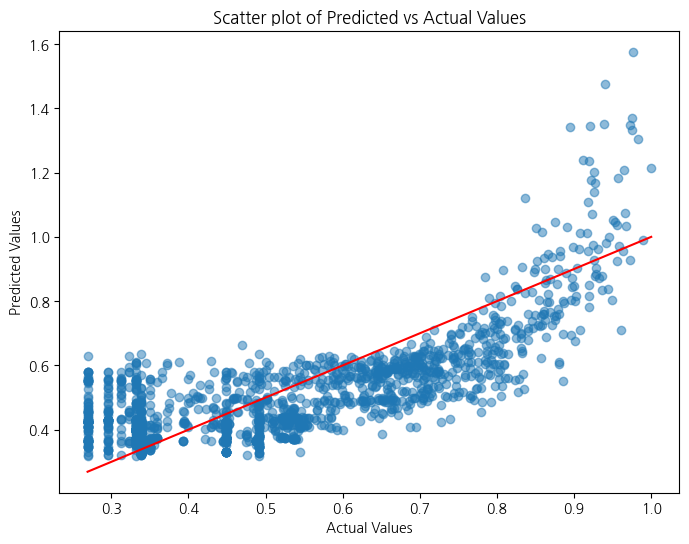

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

linear_reg = LinearRegression()

# 학습
linear_reg.fit(X_train, y_train)

#테스트 셋에 대해서 예측
pred = linear_reg.predict(X_test)

# mae계산 
mae = mean_absolute_error(y_test, pred)
print('Test MAE:', mae)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.title('Scatter plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # ideal prediction line
plt.show()



모델링

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
#params 설정
params = {'colsample_bytree': [0.5, 0.7, 1.0], 
          'gamma': [0, 0.1, 0.2], 
          'learning_rate': [0.05, 0.1, 0.15], 
          'max_depth': [5, 7, 9], 
          'min_child_weight': [1, 3, 5], 
          'subsample': [0.5, 0.7, 1.0]}

#모델 설정 
xg = XGBRegressor(objective='reg:squarederror')


grid = GridSearchCV(xg, params, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

#fit
grid.fit(X_train, y_train)


best_model = grid.best_estimator_
best_score = -grid.best_score_
best_params = grid.best_params_

#best score, parameters 출력하기
print("Best MAE: ", best_score)
print("Best parameters: ", best_params)

# 모든 모델의 점수 얻기
cv_results = grid.cv_results_

# 점수와 매개변수를 단일 목록으로 결합하고 점수별로 정렬
scores_params = sorted(zip(cv_results['mean_test_score'], cv_results['params']), key=lambda x: x[0], reverse=True)

# 상위 5개 모델 출력 
for i in range(5):
    print(f"Model {i+1} MAE: {-scores_params[i][0]}")  # Negate the score because we used neg_mean_absolute_error
    print(f"Model {i+1} parameters: {scores_params[i][1]}")


pred = best_model.predict(X_test)

print('Test MAE:', mean_absolute_error(y_test, pred))


Fitting 10 folds for each of 729 candidates, totalling 7290 fits
Best MAE:  0.032320367191202744
Best parameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.5}
Model 1 MAE: 0.032320367191202744
Model 1 parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.5}
Model 2 MAE: 0.03233019422773427
Model 2 parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.7}
Model 3 MAE: 0.03234599380321196
Model 3 parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.7}
Model 4 MAE: 0.03234652065787813
Model 4 parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.7}
Model 5 MAE: 0.03235532161753073
Model 5 parameters: {'colsample_bytree': 1.0, 'gamma

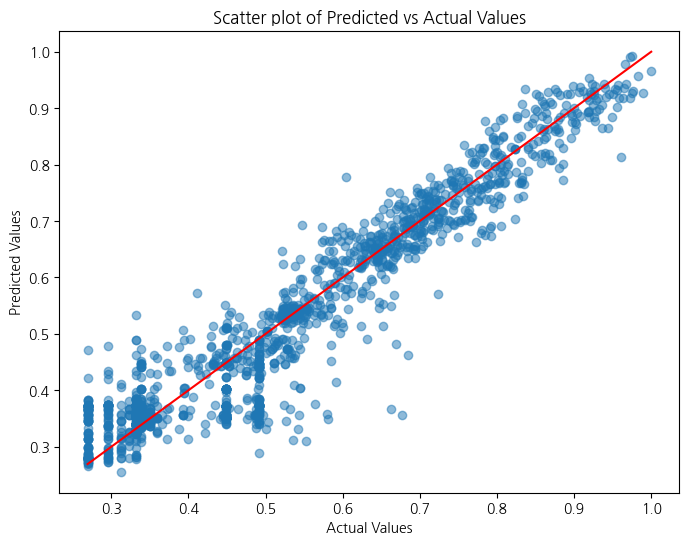

In [36]:
pred = best_model.predict(X_test)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.title('Scatter plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # ideal prediction line
plt.show()

Fitting 10 folds for each of 729 candidates, totalling 7290 fits
Best MAE:  0.032502777934806194
Best parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 1, 'num_leaves': 93, 'subsample': 0.5}
Model 1 MAE: 0.032502777934806194
Model 1 parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 1, 'num_leaves': 93, 'subsample': 0.5}
Model 2 MAE: 0.032502777934806194
Model 2 parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 1, 'num_leaves': 93, 'subsample': 0.7}
Model 3 MAE: 0.032502777934806194
Model 3 parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 1, 'num_leaves': 93, 'subsample': 1.0}
Model 4 MAE: 0.032502777934806194
Model 4 parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 3, 'num_leaves': 93, 'subsample': 0.5}
Model 5 MAE: 0.032502777934806194
Model 5 paramet

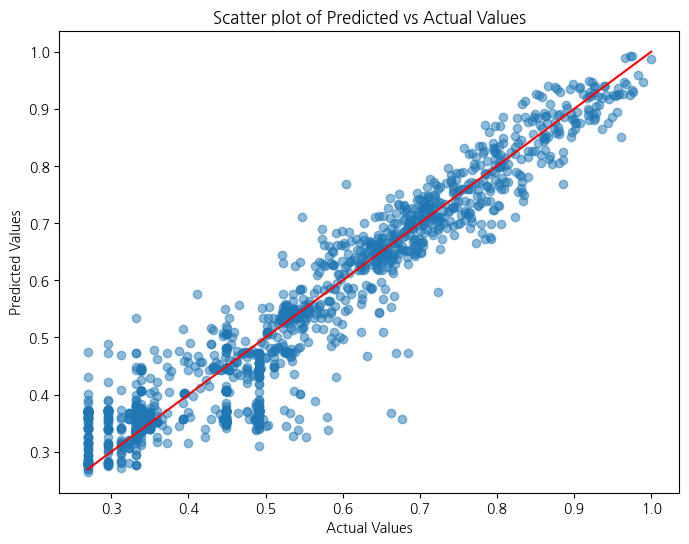

In [37]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#params 설정
params = {'colsample_bytree': [0.5, 0.7, 1.0], 
          'learning_rate': [0.05, 0.1, 0.15], 
          'max_depth': [5, 7, 9], 
          'min_child_weight': [1, 3, 5], 
          'subsample': [0.5, 0.7, 1.0],
          'num_leaves': [31, 62, 93]}
#모델설정
lgbm = LGBMRegressor(objective='regression')


grid = GridSearchCV(lgbm, params, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit 
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_score = -grid.best_score_  #GridSearchCV 가 음의 MAE 사용 
best_params = grid.best_params_


print("Best MAE: ", best_score)
print("Best parameters: ", best_params)

# 모든 모델의 점수 얻기
cv_results = grid.cv_results_

# 점수와 매개 변수를 하나의 목록으로 결합하고 점수별로 정렬
scores_params = sorted(zip(cv_results['mean_test_score'], cv_results['params']), key=lambda x: x[0], reverse=True)

# 상위 5개 모델
for i in range(5):
    print(f"Model {i+1} MAE: {-scores_params[i][0]}")  # Negate the score because we used neg_mean_absolute_error
    print(f"Model {i+1} parameters: {scores_params[i][1]}")

# 테스트 세트에서 예측
pred = best_model.predict(X_test)
# MAE 계산 및 출력
print('Test MAE:', mean_absolute_error(y_test, pred))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.title('Scatter plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # ideal prediction line
plt.show()


Lasso Regression MAE: 0.1486343650905182
Random Forest MAE: 0.033407116643540596
Lasso Regression MAE: 0.1486343650905182


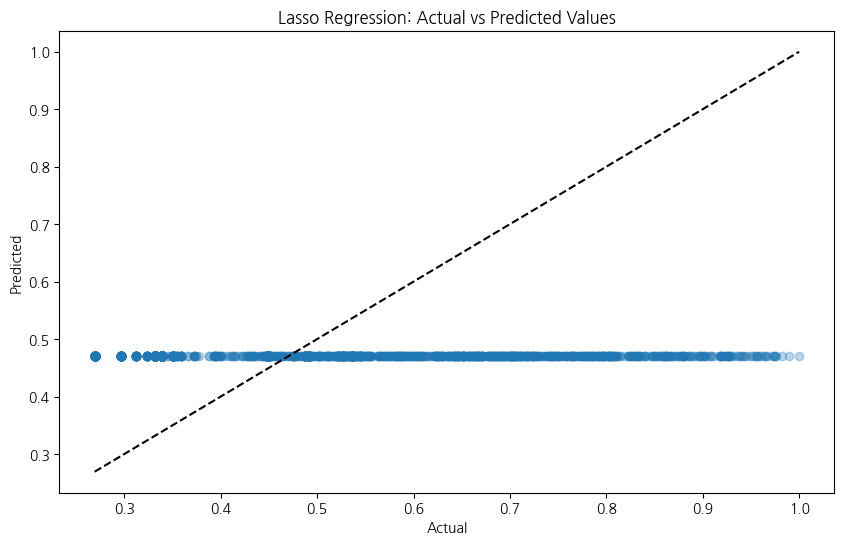

Random Forest MAE: 0.03351438467804899


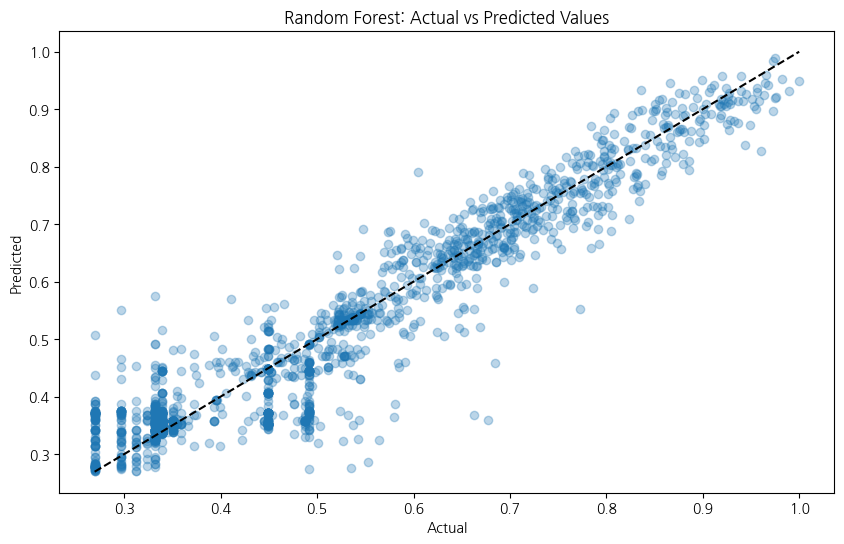

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
imputer = SimpleImputer(strategy='mean')  # 평균 대치를 사용
imputer.fit(X_train)  # X_train에 대해 fit 메서드를 호출하여 적합시킵니다

## 최적의 결과를 찾기 위해서 다양한 regression 모델을 사용해보았습니다

# X_train에 대해서만 결측값 처리를 수행합니다.
X_train = imputer.transform(X_train)
# X_test에 대해서도 결측값 처리를 수행합니다.
X_test = imputer.transform(X_test)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print('Lasso Regression MAE:', lasso_mae)

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print('Random Forest MAE:', rf_mae)


# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print('Lasso Regression MAE:', lasso_mae)

# Visualize Lasso Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted Values')
plt.show()

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print('Random Forest MAE:', rf_mae)

# Visualize Random Forest predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted Values')
plt.show()

In [39]:
(y==np.NAN).sum()

0

In [40]:
df

,Unnamed: 0,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,개봉월
0,1,극한직업,13.0,12.0,2019-01-23,1,1978,139647979516,16264944,31858660536,3638287,7.0,1,일반영화,1
1,2,신과함께-죄와 벌,2.0,15.0,2017-12-20,1,1912,115698654137,14410754,27530825087,3346172,4.0,0,일반영화,12
2,3,어벤져스: 엔드게임,5.0,9.0,2019-04-24,0,2835,122182694160,13934592,33577136860,3597963,3.0,0,일반영화,4
3,4,겨울왕국 2,1.0,9.0,2019-11-21,0,2648,114810421450,13747792,28824682580,3225974,5.0,2,일반영화,11
4,5,베테랑,9.0,12.0,2015-08-05,1,1064,105024756250,13395400,26766369950,3290366,3.0,1,일반영화,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14287,14295,SNS 러브,15.0,15.0,2021-01-28,0,1,1000,1,0,0,18.0,3,일반영화,1
14290,14298,VIP전용 여자,15.0,17.0,2016-12-01,6,1,8000,1,0,0,20.0,3,일반영화,12
14291,14299,VJ의 은밀한 사생활,15.0,16.0,2017-12-25,6,1,6000,1,0,0,18.0,3,일반영화,12
14292,14300,XX 니들은 하지마라 결혼,15.0,15.0,2022-11-16,1,1,6000,1,0,0,20.0,3,일반영화,11


In [42]:
y

array([[1.        ],
       [0.99266881],
       [0.99479365],
       ...,
       [0.3390051 ],
       [0.3390051 ],
       [0.35021374]])

In [43]:
y_labels = np.digitize(y, bins=[0, 1/3, 2/3])
print(y_labels)

[[3]
 [3]
 [3]
 ...
 [2]
 [2]
 [2]]


Best Model:  RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=300,
                       random_state=42)
Best Parameters:  {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 300}
Top 5 Models:
Model 1 Accuracy: 0.8789109975038143
Model 1 Parameters: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 300}

Model 2 Accuracy: 0.8785815082122163
Model 2 Parameters: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 200}

Model 3 Accuracy: 0.8783619692440494
Model 3 Parameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 300}

Model 4 Accuracy: 0.8782522600397484
Model 4 Parameters: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 100}

Model 5 Accuracy: 0.8780327813513642
Model 5 Parameters: {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 200}

Accuracy: 0.8757682177348551
Precision: 0.8713842721233119
Recall: 0.8123170923679724
F1 Score: 0.8361138178468819


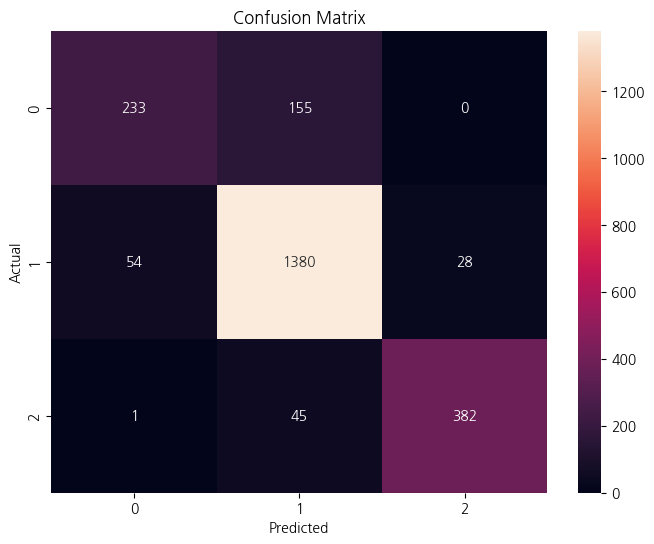

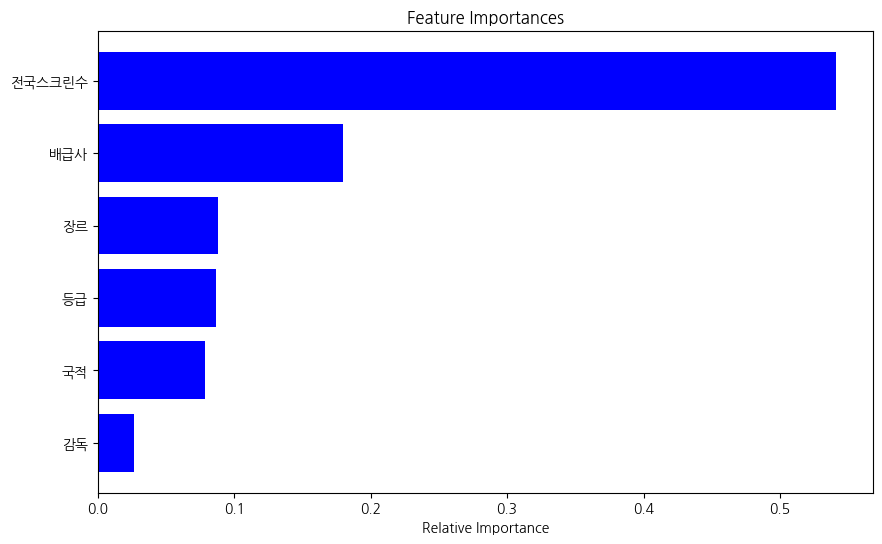

In [44]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# 결측값 처리를 위한 Imputer 객체 생성
imputer = SimpleImputer()

# X_train에 대해서만 결측값 처리를 수행
X_train = imputer.fit_transform(X_train)

# X_test에 대해서도 결측값 처리를 수행
X_test = imputer.transform(X_test)

# 모델 설정
model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 8]
}

# GridSearchCV를 사용하여 최적의 매개 변수 탐색
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# 최적의 모델과 매개 변수 출력
best_model = grid.best_estimator_
best_params = grid.best_params_
print("Best Model: ", best_model)
print("Best Parameters: ", best_params)

# 상위 5개 모델 출력
cv_results = grid.cv_results_
scores_params = sorted(zip(cv_results['mean_test_score'], cv_results['params']), key=lambda x: x[0], reverse=True)
print("Top 5 Models:")
for i in range(5):
    params = {key: value for key, value in scores_params[i][1].items() if key in param_grid}
    print(f"Model {i+1} Accuracy: {scores_params[i][0]}")
    print(f"Model {i+1} Parameters: {params}")
    print()

# 테스트 세트에서 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()
